In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections
import re
import warnings
import plotly.subplots as sp
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [112]:
df=pd.read_csv("C:\\Users\\Manu\\Downloads\\titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [114]:
df.isnull() .sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [115]:
for i in df.columns:
    null_rate=df[i] .isna() .sum()/len(df)*100
    if null_rate > 0:
        print(f"{i}'s nullrate : {null_rate}%")

description's nullrate : 1.2055516158443926%
age_certification's nullrate : 65.71775909229055%
seasons's nullrate : 86.25265930503495%
imdb_id's nullrate : 6.757167460237058%
imdb_score's nullrate : 10.343430250227941%
imdb_votes's nullrate : 10.44473710870226%
tmdb_popularity's nullrate : 5.541485158545234%
tmdb_score's nullrate : 21.092087934353156%


In [116]:
df1 = df.drop(columns = ['seasons', 'age_certification'])

In [117]:
df1['imdb_score'] = df1['imdb_score'].fillna(df1['imdb_score'].mode()[0])
df1['imdb_votes'] = df1['imdb_votes'].fillna(df1['imdb_votes'].mean())
df1['tmdb_popularity'] = df1['tmdb_popularity'].fillna(df1['tmdb_popularity'].mean())
df1['tmdb_score'] = df1['tmdb_score'].fillna(df1['tmdb_score'].mode()[0])
df1['imdb_id'].replace(np.nan, 'No Data', inplace = True)
df1['description'].replace(np.nan, 'No Data', inplace = True)

In [118]:
df1.isnull() .sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [119]:
df1.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6


In [120]:
px.pie(df1, values='type', title ="Movies and Show on Amazon Prime")

In [121]:
plt.figure(figsize=(10,10))
px.histogram(df1, x= "release_year" , color = "type",
            labels={
                "release_year": "Release Year",
                     "count": "Count",
                     "type": "type"
            },
            title="Distribution of Show/Movie per Release Year")

<Figure size 1000x1000 with 0 Axes>

In [122]:
plt.figure(figsize=(10,10))
px.histogram(df1, x= "runtime" , color = "type",
            labels={
                "runtime": "Runtime (Minute)",
                     "count": "Count",
                     "type": "type"
            },
            title="Distribution of Runtime per Show/Movie")

<Figure size 1000x1000 with 0 Axes>

## Count of Titles by Type

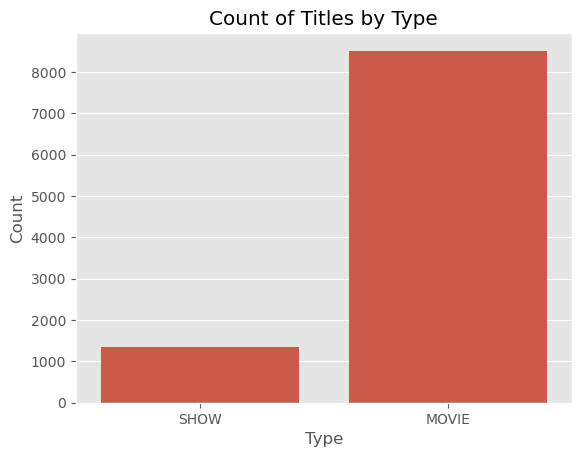

In [124]:
sns.countplot(data=df, x='type')
plt.title('Count of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Number of Titles Released per Year

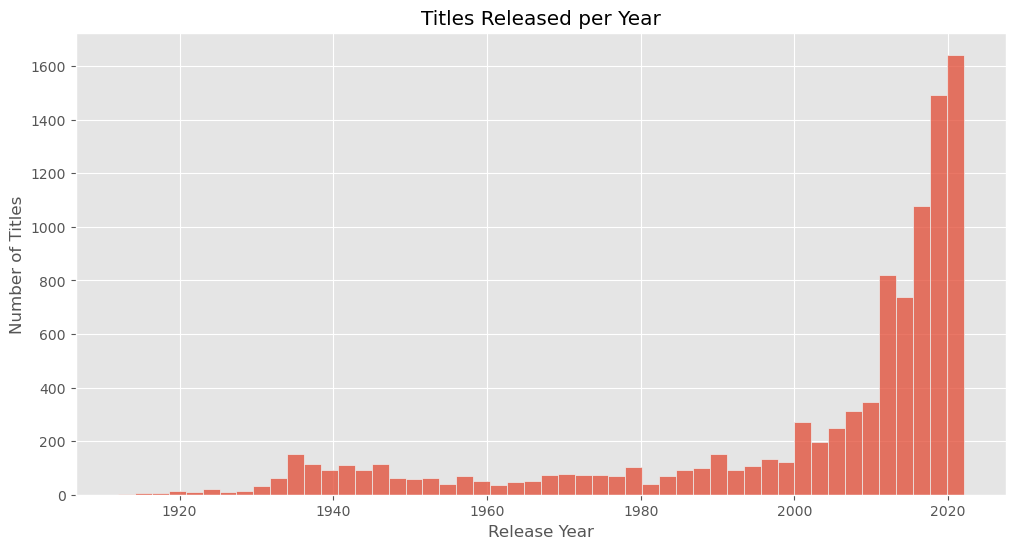

In [126]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=50, kde=False)
plt.title('Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

 ## Distribution of IMDb Scores

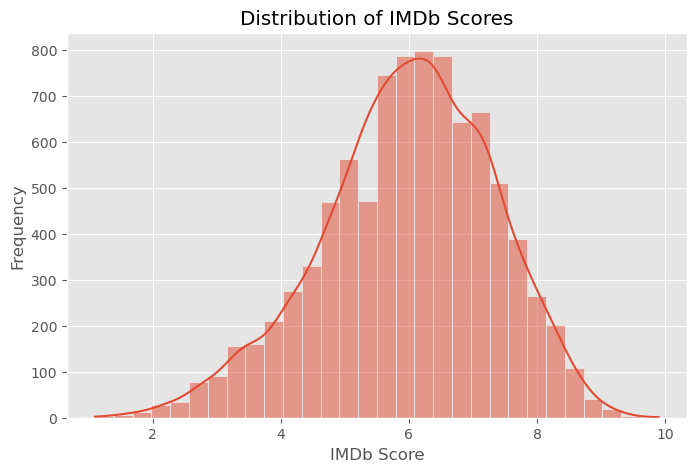

In [128]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='imdb_score', bins=30, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

## Runtime vs IMDb Score Scatter Plot

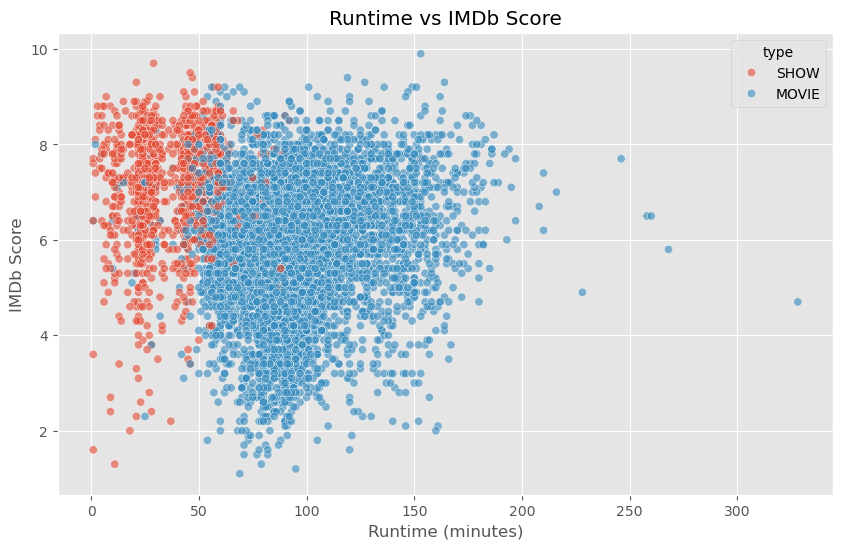

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='imdb_score', hue='type', alpha=0.6)
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

## Top 10 Production Countries by Number of Titles

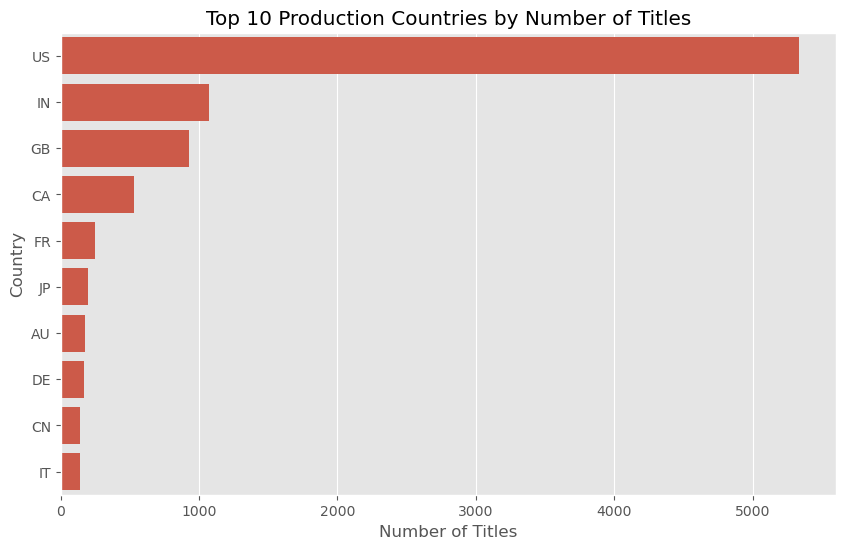

In [132]:
df_countries = df.copy()
df_countries['production_countries'] = df_countries['production_countries'].apply(ast.literal_eval)
df_countries = df_countries.explode('production_countries')

top_countries = df_countries['production_countries'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Production Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##  IMDb Score Trend Over Years (for Movies and Shows)

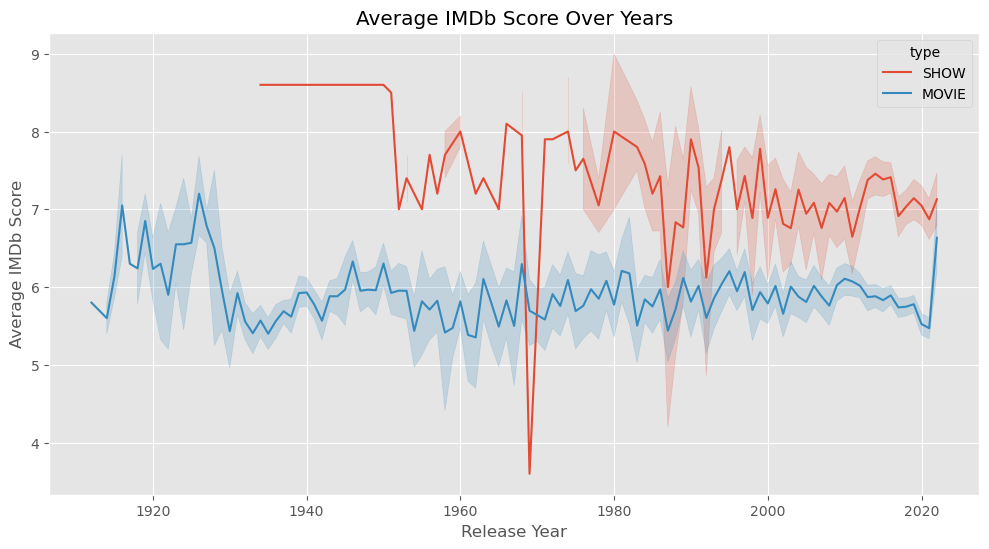

In [134]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='imdb_score', hue='type', estimator='mean')
plt.title('Average IMDb Score Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.show()

## TMDb Popularity vs IMDb Votes (Log Scale)

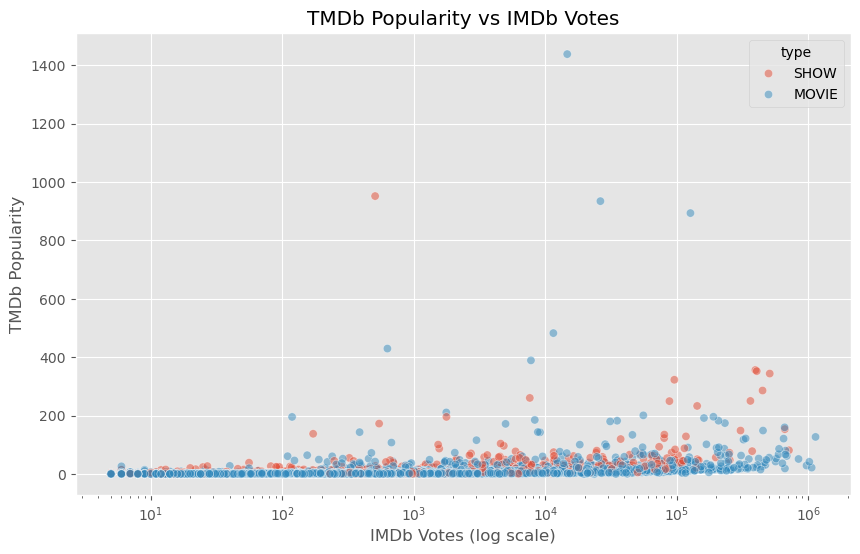

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_votes', y='tmdb_popularity', hue='type', alpha=0.5)
plt.xscale('log')
plt.title('TMDb Popularity vs IMDb Votes')
plt.xlabel('IMDb Votes (log scale)')
plt.ylabel('TMDb Popularity')
plt.show()

## Distribution of Title Runtimes by Type

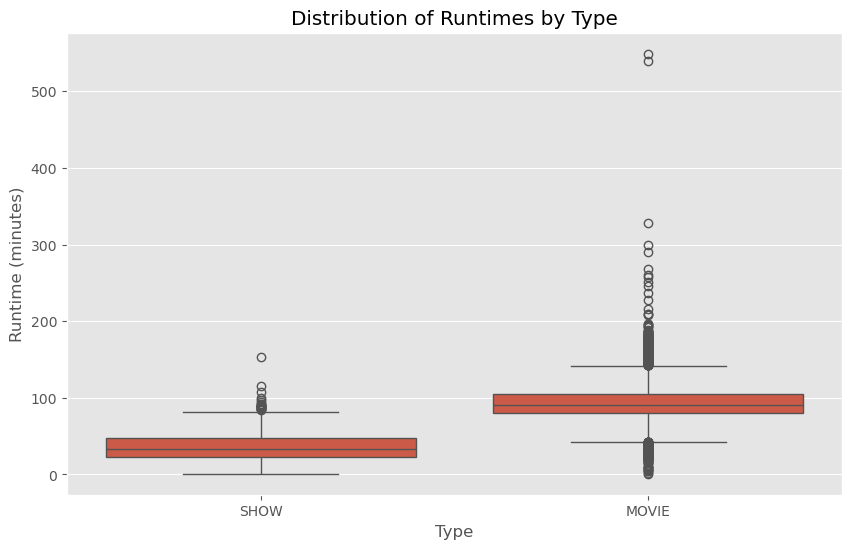

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='runtime')
plt.title('Distribution of Runtimes by Type')
plt.ylabel('Runtime (minutes)')
plt.xlabel('Type')
plt.show()

## Count of Titles by Age Certification

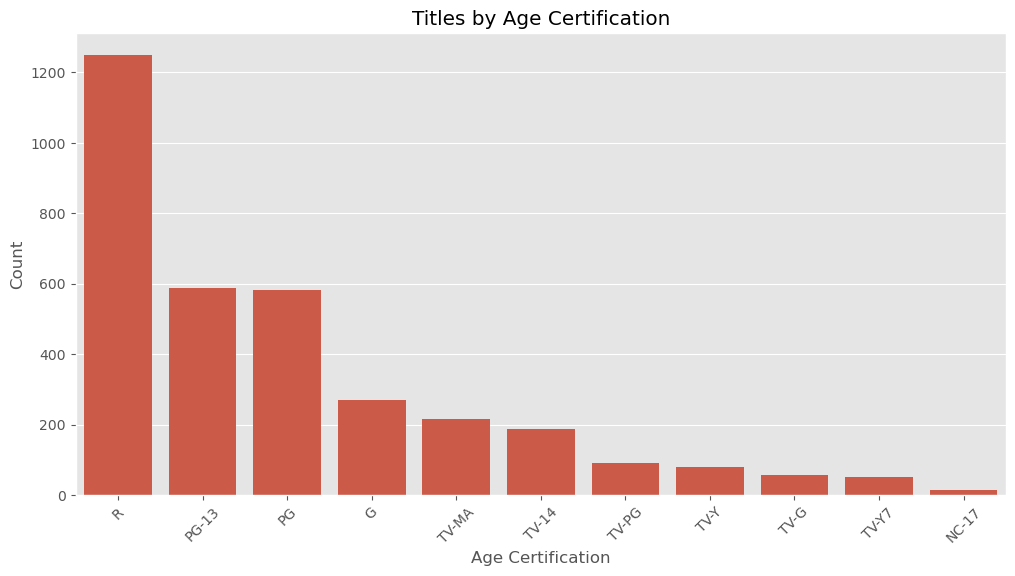

In [140]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_certification', order=df['age_certification'].value_counts().index)
plt.title('Titles by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()